In [526]:
from anndata import read_h5ad
import scanpy as sc
import numpy as np
import pandas as pd
from os.path import join

sc.set_figure_params(dpi=200)

In [527]:
# Reference: https://github.com/czbiohub/tabula-muris/blob/26e6d49b35e88accf0aa8db25d4f73f812a6df6c/reordering_injects_randomness.Rmd

In [528]:
TISSUE = "Heart"

In [529]:
adata = read_h5ad(join("data", "raw", "tm", "adata", f"{TISSUE}.h5ad"))
adata

AnnData object with n_obs × n_vars = 6002 × 23433
    obs: 'cell_ontology_class', 'cell_ontology_id', 'cluster.ids', 'free_annotation', 'mouse.id', 'mouse.sex', 'plate.barcode', 'subsetA', 'subsetA_cluster.ids', 'subsetB', 'subsetB_cluster.ids', 'subsetC', 'subsetC_cluster.ids', 'subsetD', 'subsetD_cluster.ids', 'subsetE', 'subsetE_cluster.ids', 'subtissue', 'tissue'
    obsm: 'X_tsne'

In [530]:
# Remove spike-in control genes
adata.var['ercc'] = adata.var_names.str.startswith('ERCC-')
adata = adata[:, ~adata.var['ercc']]

/Users/mkeller/anaconda3/envs/lr-env/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [531]:
adata.var['Rn45s'] = adata.var_names == 'Rn45s'
adata = adata[:, ~adata.var['Rn45s']]

Trying to set attribute `.var` of view, copying.


In [532]:
# Remove cells without a cell ontology ID
adata = adata[adata.obs['cell_ontology_id'] != 'nan', :]

In [533]:
sc.pp.filter_cells(adata, min_genes=500)

Trying to set attribute `.obs` of view, copying.


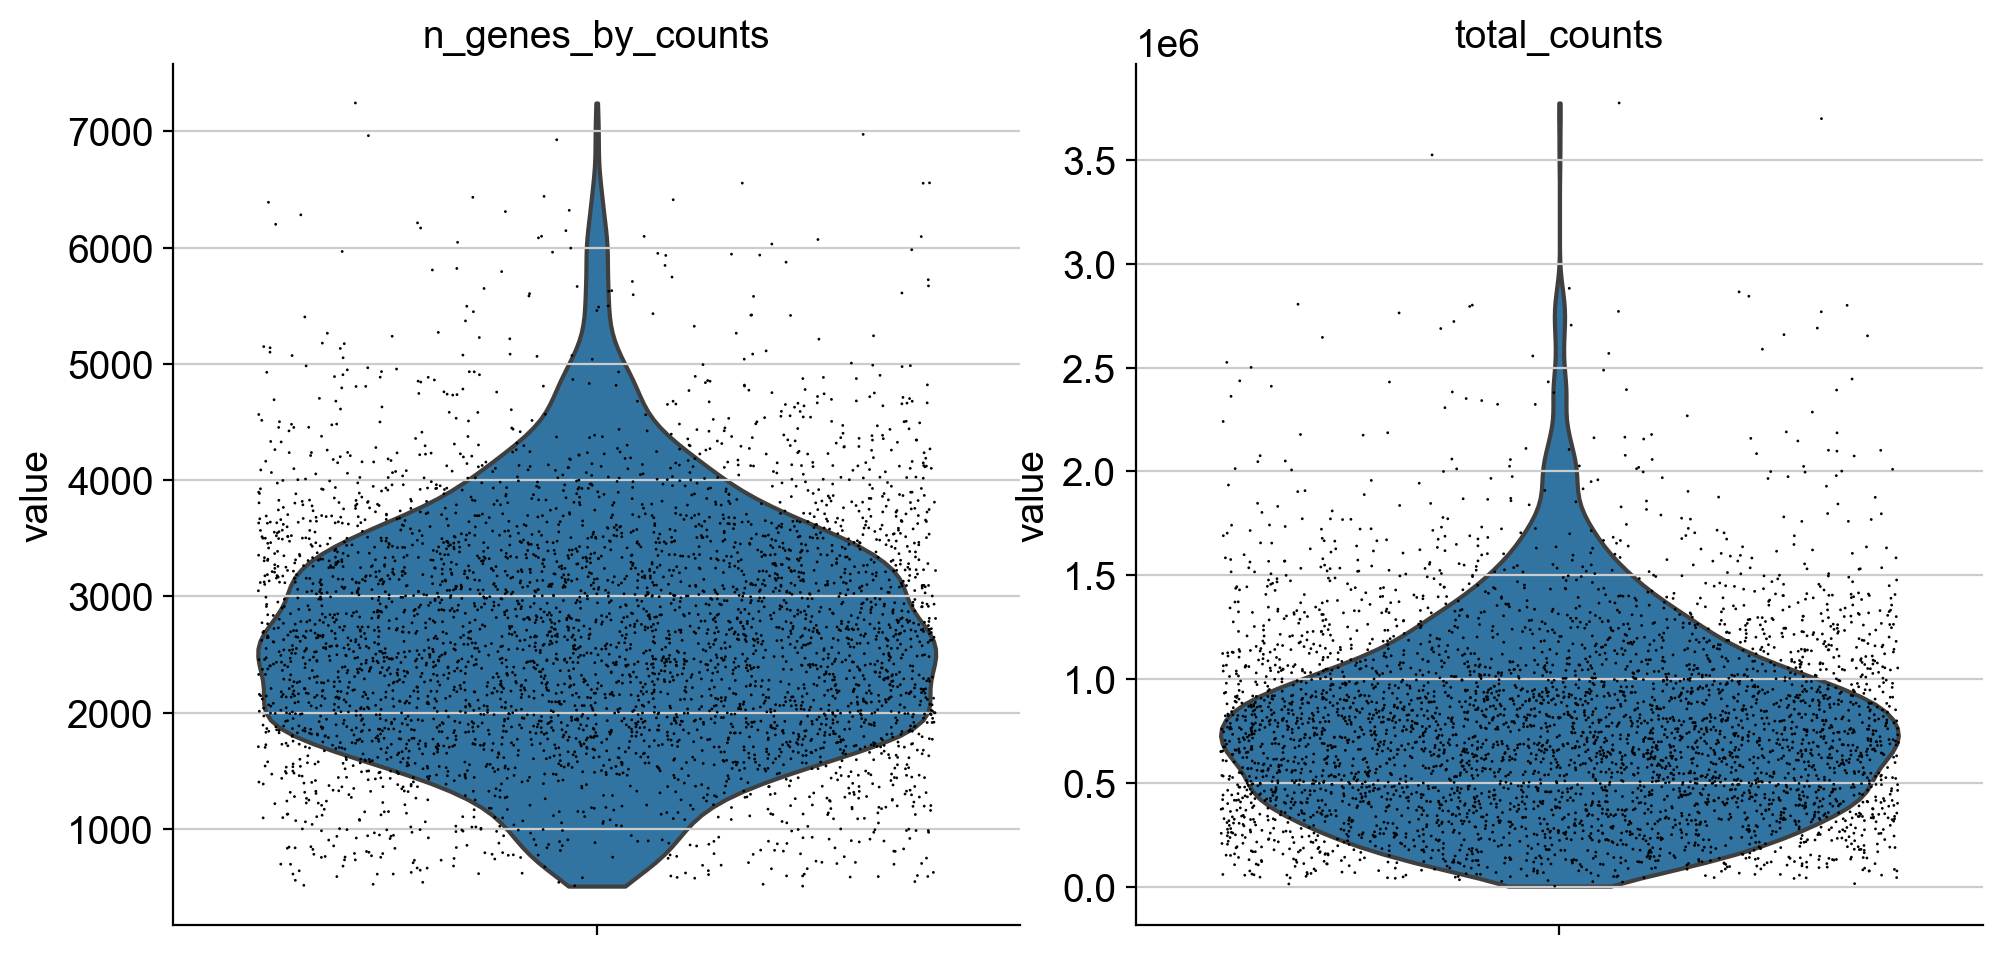

In [534]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)

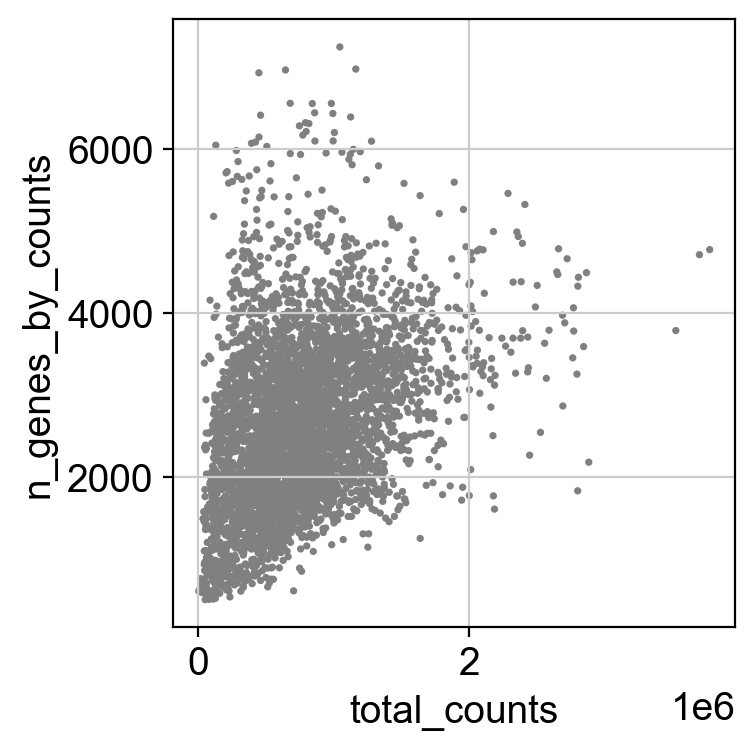

In [535]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [536]:
#adata = adata[adata.obs['pct_counts_Rn45s'] < 40.0, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata = adata[:, adata.var.highly_variable]
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_Rn45s'])

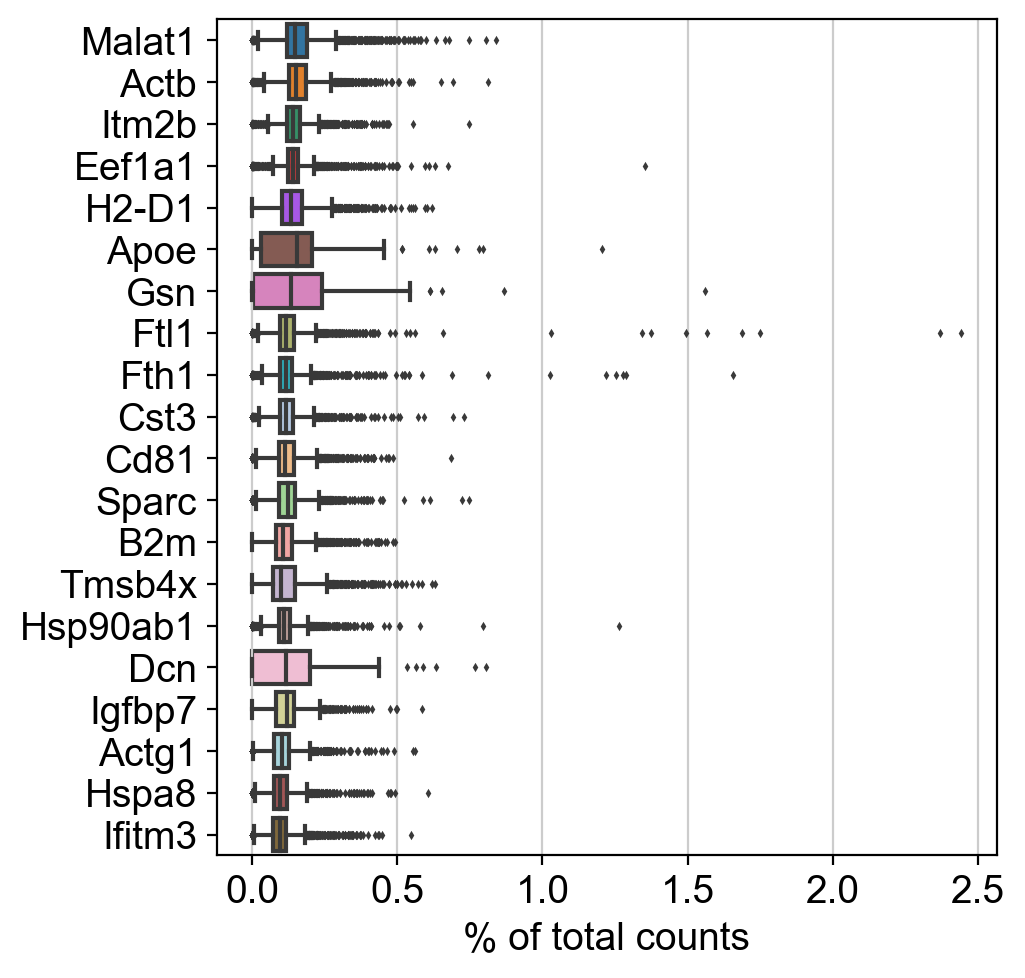

In [537]:
sc.pl.highest_expr_genes(adata, n_top=20, )

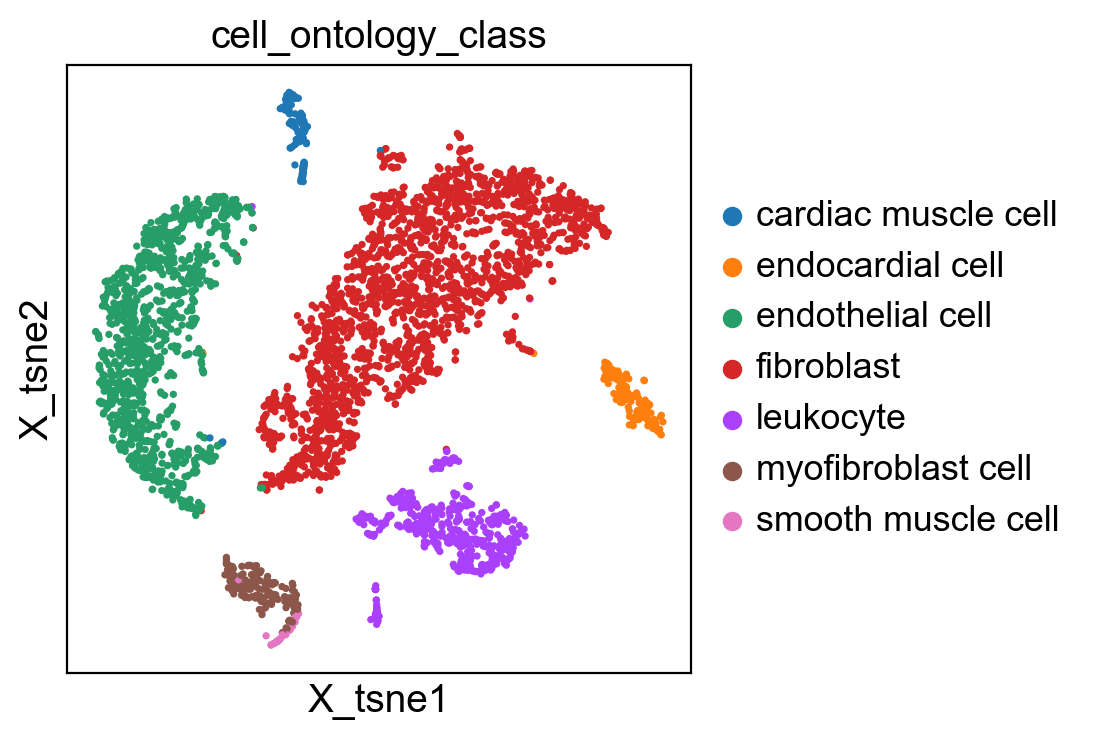

In [538]:
sc.pl.embedding(adata, basis="X_tsne", color=["cell_ontology_class"], save=join(f"{TISSUE}.png"))

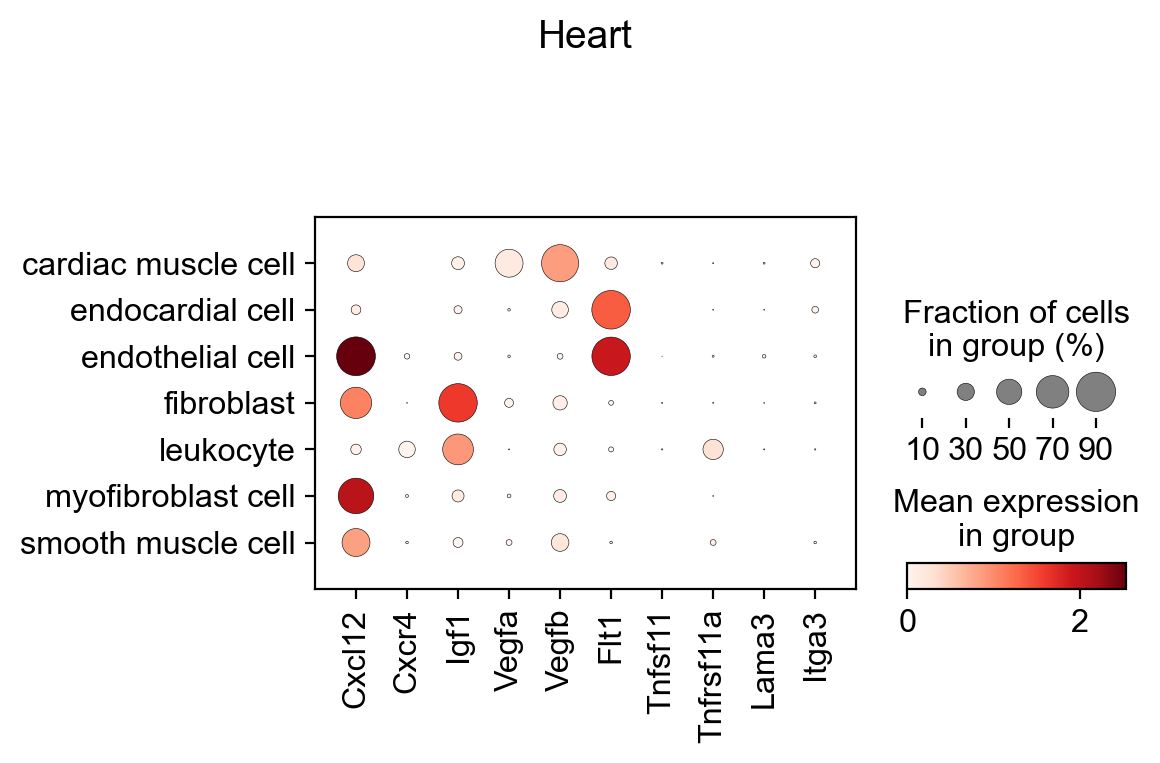

In [539]:
marker_genes_dict = ['Cxcl12', 'Cxcr4', 'Igf1', 'Vegfa', 'Vegfb', 'Flt1', 'Tnfsf11', 'Tnfrsf11a', 'Lama3', 'Itga3']
sc.pl.dotplot(adata, marker_genes_dict, 'cell_ontology_class', title=TISSUE, save=join(f"{TISSUE}.png"))